Files already downloaded and verified
Files already downloaded and verified


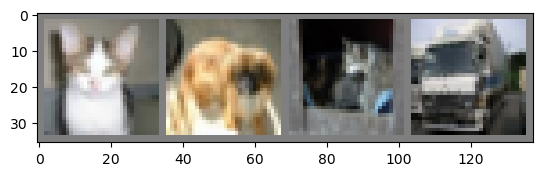

cat   dog   cat   truck
[1,  2000] loss: 2.177
[1,  4000] loss: 1.816
[1,  6000] loss: 1.659
[1,  8000] loss: 1.587
[1, 10000] loss: 1.513
[1, 12000] loss: 1.485
[2,  2000] loss: 1.414
[2,  4000] loss: 1.370
[2,  6000] loss: 1.364
[2,  8000] loss: 1.342
[2, 10000] loss: 1.332
[2, 12000] loss: 1.288
Finished Training


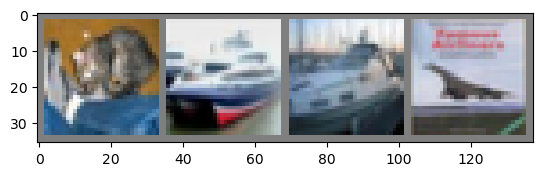

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   car   car   plane
Accuracy of the network on the 10000 test images: 55 %
Accuracy for class: plane is 55.3 %
Accuracy for class: car   is 75.5 %
Accuracy for class: bird  is 34.1 %
Accuracy for class: cat   is 31.7 %
Accuracy for class: deer  is 54.2 %
Accuracy for class: dog   is 47.0 %
Accuracy for class: frog  is 68.3 %
Accuracy for class: horse is 64.5 %
Accuracy for class: ship  is 63.7 %
Accuracy for class: truck is 58.3 %
cpu


In [11]:
%matplotlib inline 
#매직코드 / 도표와 같은 그림, 소리, 애니메이션과 같은 결과물을 브라우저 내부(inline)에 표시함


# 1. torchvision 을 사용하여 CIFAR10의 학습용 / 시험용 데이터셋을 불러오고, 정규화(nomarlizing)합니다.
# 텐서(다차원 배열)을 생성 및 조작, 신경망을 구현
import torch 
# 컴퓨터 비전 애플리케이션에 특정한 데이터 세트, 변환 및 모델 제공
import torchvision 
# torchvision.transforms: 신경망을 훈련하기 전 데이터를 전처리 과정에 사용되는 이미지 변환 기능(크기 조정, 자르기, 뒤집기, 정규화 등) 포함
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# transforms.ToTensor(): 데이터 세트의 영상을 PILimage에서 PyTorch 텐서로 변환
# transforms.Normalize(): 세 개의 RGB 채널 평균과 표준 편차의 픽셀 값을 정규화

batch_size = 4 # 교육, 테스트 중 한 번에 처리할 이미지 수

# 트레인 세트 변수 생성
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# 데이터 세트 다운로드 -> 데이터 세트의 각 이미지에 변환 파이프라인 적용


# DataLoader(): trainLoader 변수 생성: 데이터 배치를 생서와는 반복 가능한 개체
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# 데스트 세트 변수 생성
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
# 데이터 세트의 각 이미지에 변환 파이프라인을 적용

# 테스트 로더 변수 생성: 데이터 배치를 생성하는 반복 가능한 개체 생성
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# 클래스 이름을 튜플로 생성: 예측 인덱스를 해당 클래스에 매핑
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 데이터 세트의 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주는 함수
def imshow(img) :
    img =img/2+0.5
    npimg =img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
# [0,1] 범위로 픽셀 값을 스케일링하여 정규화를 해제
# Tensor -> numpy로 변환
# 치수(높이, 폭, 채널) 변경

    
# 랜덤 트레이닝 이미지를 가져오기
# 다음 이미지 및 레이블 배치를 가져옴
dataiter=iter(trainloader)
images, labels=next(dataiter)

# 이미지를 보여줌
# 이미지 그리드 표시
imshow(torchvision.utils.make_grid(images))

# 라벨 프린트
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


# 2. 합성곱 신경망(Convolution Neural Network)을 정의합니다.
import torch.nn as nn
# 신경망을 정의하기 위한 자원 제공
import torch.nn.functional as F
# 활성화 함수, 손실 함수 등 신경망 구성요소를 구축하기 위한 기능 제공

# 신경망 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # 신경망의 여러 레이어 정의
        # Convolutional layer 1
        self.conv1 = nn.Conv2d(3, 6, 5) 
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2) 
        # Convolutional layer 2
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # Fully connected layer 1
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        # Fully connected layer 2
        self.fc2 = nn.Linear(120, 84) 
        # Fully connected layer 3
        self.fc3 = nn.Linear(84, 10)

    # 데이터가 네트워크를 통과할 때 실행되는 신경망 전진 패스 함수
    # 각 레이어를 순차적으로 입력 데이터에 적용하는 순방향 방법을 사용
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # 배치를 제외한 모든 치수 평탄화
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 신경망 인스턴스 생성
net = Net()


# 3. 손실 함수를 정의합니다.
import torch.optim as optim

# CrossEntropyLoss(): 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 최적화 도구 정의
# SGD: Stochastic Gradient Descent 확률적 경사 하강법
# 기계 학습에서 목적 함수를 최소화하기 위해 사용되는 최적화 알고리즘, 신경망 훈련에서 일반적으로 사용됨
# 최적화 도구에 모델 매개 변수 전달
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



# 4. 학습용 데이터를 사용하여 신경망을 학습합니다.
for epoch in range(2):  
    running_loss = 0.0
    
    # 교육 데이터 세트의 데이터 배치를 통해 반복 
    # trainloader: 데이터 배치를 반복하는 반복기
    for i, data in enumerate(trainloader, 0): 
        # 입력 및 레이블은 데이터 튜플에서 추출
        inputs, labels = data

        # 최적화된 모든 텐서의 그라데이션을 지움
        optimizer.zero_grad() 

        # forward + backward + optimize
        outputs = net(inputs)
        # 예측 값과 실제 값 사이의 손실을 계산, 손실 함수
        loss = criterion(outputs, labels) 
        loss.backward()
        # 계산괸 그라데이션을 기준으로 매개 변수를 업데이트
        optimizer.step() 

        # 배치에 대한 실행 손실을 추적하고 2000개의 미니 배치마다 평균 손실을 출력
        # 손실을 스칼라로 변환
        running_loss += loss.item() 
        if i % 2000 == 1999:    
            # running_loss: mini-batch에 대한 누적 손실 추적
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}') 
            running_loss = 0.0

print('Finished Training')

# 훈련된 신경망의 상태 사전을 현재 디렐터리에 있는 파일에 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
# net.state_dict(): 네트워크의 모든 학습 가능한 매개 변수를 포함하는 사전을 반환
# torch.save(): 지정된 파일 경로에 상태 사전을 저장 -> 새로운 데이터에 대한 평가 또는 예측과 같은 추가 사용을 위한 훈련된 모델을 다시 로드할 수 있음


# 5. 시험용 데이터를 사용하여 신경망을 검사합니다.
# 테스트 데이터 세트의 이미지 샘플과 해당 실측값 레이블을 시각화
# iter(): 테스트로더 데이터세트에 대한 반복기 생성
dataiter = iter(testloader) 
images, labels = next(dataiter) 
# next(): 한 번에 하나의 배치로 데이터세트를 반복, 다음 영상 배치와 해당 라벨을 반환한 다음, 영상과 해당 라벨을 각각 영상과 라벨에 할당

# print images
# 영상을 그리드 형식으로 표시
imshow(torchvision.utils.make_grid(images)) 
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
# 클래스 목록에서 해당 레이블 이름을 조회하는 형식화된 문자열을 사용, 배치에서 처음 4개 이미지의 실측 레이블을 표시하는데 사용

# 신경망 모델의 인스턴스 생성
net = Net() 
# load_state_dict(): 지정된 경로에서 저장된 모델의 상태 사전을 로드하는데 사용
net.load_state_dict(torch.load(PATH)) 
# 훈련된 신경망 모델의 저장된 가중치와 편향은 load_state_dict를 사용하여 모델에 다시 로드 -> 로드된 모형을 검정 또는 예측에 사용할 수 있음

# 훈련된 신경망 모델 넷를 입력 이미지 배치에 적용하고 배치의 각 입력 이미지에 대한 모델 출력을 생성
outputs = net(images)

# 로드된 넷 모델을 사용하요 이미지 텐서에 대한 예측 수행
# torch.max(): 출력 텐더에서 각 행의 최대값 인덱스를 찾는데 사용 / 이미지의 예측 클래스 해당
_, predicted = torch.max(outputs, 1)  

# 클래스 목록을 사용하여 예측 클래스 인덱스가 해당 클래스 이름으로 변환
# 처음 4개 이미지에 대한 예측 클래스 이름을 출력
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


# 테스트 데이터 세트에서 훈련된 신경망의 정확성을 평가
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 네트워크를 통해 이미지를 실행하여 출력 계산
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
# 훈련된 신경망을 사용하여 출력을 계산하고 에너지가 가장 높은 클래스를 예측으로 선택
# 총 레이블 수는 배치 크기에 따라 증가하고 정확하게 예측된 레이블 수는 예측 클래스가 실제 레이블과 동일한 레이블 수에 따라 증가
# 정확하게 예측된 레이블 수를 이용하여 네트워크의 정확도를 계산

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# 테스트 데이터 세트의 각 개별 클래스에 대한 모델의 정확도를 계산
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 클래스에 대한 정확한 예측 수집
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
# 테스트 데이터 세트에 대한 루프가 수행 -> 이미지가 네트워크를 통해 전달 -> 예측된 출력을 얻음 -> 정확하고 총 예측이 사전에서 업데이트

# CUDA 장치를 사용할 수 있는지 여부를 확인 -> 사용 가능한 경우 해당 장치를 변수 장치에 할당
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


print(device)

net.to(device)

inputs, labels = data[0].to(device), data[1].to(device)

del dataiter
